In [31]:
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


In [32]:
original_cvd_df = pd.read_csv('files/cardio_train.csv', sep=';')
cvd_df = original_cvd_df.copy()
cvd_df.drop(['id'], axis=1, inplace=True)
original_cvd_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
# divide by 365 to get the age in years
cvd_df['age'] = (cvd_df['age'] / 365.24).round(0)
cvd_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
cvd_df.describe(percentiles=[.01, .99]).transpose()

,count,mean,std,min,1%,50%,99%,max
age,70000.0,53.304571,6.760476,30.0,40.0,54.0,64.0,65.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,147.0,165.0,184.0,250.0
weight,70000.0,74.205690,14.395757,10.0,48.0,72.0,117.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,90.0,120.0,180.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,60.0,80.0,1000.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,3.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,3.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,1.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,1.0,1.0


In [35]:
# clean data
cvd_df = cvd_df.drop_duplicates()
cvd_df.drop(cvd_df[(cvd_df['ap_hi'] > 370) | (cvd_df['ap_hi'] <= 40) | \
                   (cvd_df['ap_lo'] > 370) | (cvd_df['ap_lo'] <= 40)].index, inplace=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)
cvd_df.describe(percentiles=[.01, .99]).transpose()

,count,mean,std,min,1%,50%,99%,max
age,64839.0,53.317556,6.807497,30.0,40.0,54.0,64.0,65.0
gender,64839.0,1.356298,0.478908,1.0,1.0,1.0,2.0,2.0
height,64839.0,164.348386,8.328543,55.0,146.0,165.0,184.0,250.0
weight,64839.0,74.498350,14.553507,11.0,48.0,72.0,118.0,200.0
ap_hi,64839.0,127.047240,17.039951,70.0,90.0,120.0,180.0,240.0
ap_lo,64839.0,81.414427,9.656060,45.0,60.0,80.0,105.0,182.0
cholesterol,64839.0,1.383997,0.691071,1.0,1.0,1.0,3.0,3.0
gluc,64839.0,1.237527,0.583570,1.0,1.0,1.0,3.0,3.0
smoke,64839.0,0.092676,0.289980,0.0,0.0,0.0,1.0,1.0
alco,64839.0,0.056340,0.230578,0.0,0.0,0.0,1.0,1.0


In [36]:
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

In [37]:
log_model = sm.Logit(y_train, X_train)
log_result = log_model.fit()
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.580706
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.162     
Date:               2023-12-24 17:30 AIC:              64030.8541
No. Observations:   55113            BIC:              64128.9426
Df Model:           10               Log-Likelihood:   -32004.   
Df Residuals:       55102            LL-Null:          -38189.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           0.0265    0.0014   19.2573  0.0000   0.0238   0.0292
gender        0.3027    0.0228   13.2793  0.0000   0.2580   0.


with the coeficients gived by the Logistic Regression we can know the most important features for the model, but sometimes odds ratio is not the best option to measure the importance of a variable, a good option is to look at the p-value we can see what variables are statistically significant given by  P>|z| column in describe method, and checlk if odds are well or not


In [38]:
# with exponential we can know the odds ratio, so the cholesterol has more chance to have a cardio disease
# increasing by a factor of 1.64 per unit, 

np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.559754
gender         1.353549
ap_hi          1.050868
age            1.026902
weight         1.014989
ap_lo          1.001504
height         0.944267
smoke          0.901151
gluc           0.859687
alco           0.817598
active         0.751606
dtype: float64

now in this case we can get the feature importances by the coeficients multiplied by standard deviation of the feature, so we can know the most important features for the model. this is named as model-specific feature importance method because it is specific for the model that we are using, in this case Logistic Regression in which we can get the coeficients of the model.

In [39]:
coef = log_result.params.drop(columns=['const', 'gender'])
std = np.std(X_train.drop(columns="gender"), 0)
abs(coef * std).sort_values(ascending=False)

ap_hi          0.845417
height         0.476861
cholesterol    0.307594
weight         0.216271
age            0.180589
active         0.114885
gluc           0.088348
alco           0.046406
smoke          0.030249
ap_lo          0.014531
gender              NaN
dtype: float64

### Model Interpretability method types
* **Model Specific**: When method can only be used for a specific model, for example coeficients of a Logistic Regression mention above.
* **Model Agnostic**: When method can be used for any model, for example Permutation Importance.


### Interpreting individ with logistic regression

In [40]:
y_pred = log_result.predict(X_test).to_numpy()
y_pred[2872]

0.668547079583203

In [41]:
X_test.iloc[2872]

age             56.0
gender           2.0
height         172.0
weight          92.0
ap_hi          140.0
ap_lo          100.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
Name: 20995, dtype: float64

In [45]:
X_highlight = X_test.iloc[2871].to_numpy().reshape(1, -1)
print(X_highlight)

[[ 53.   2. 158.  65. 130.  80.   1.   1.   0.   0.   1.]]


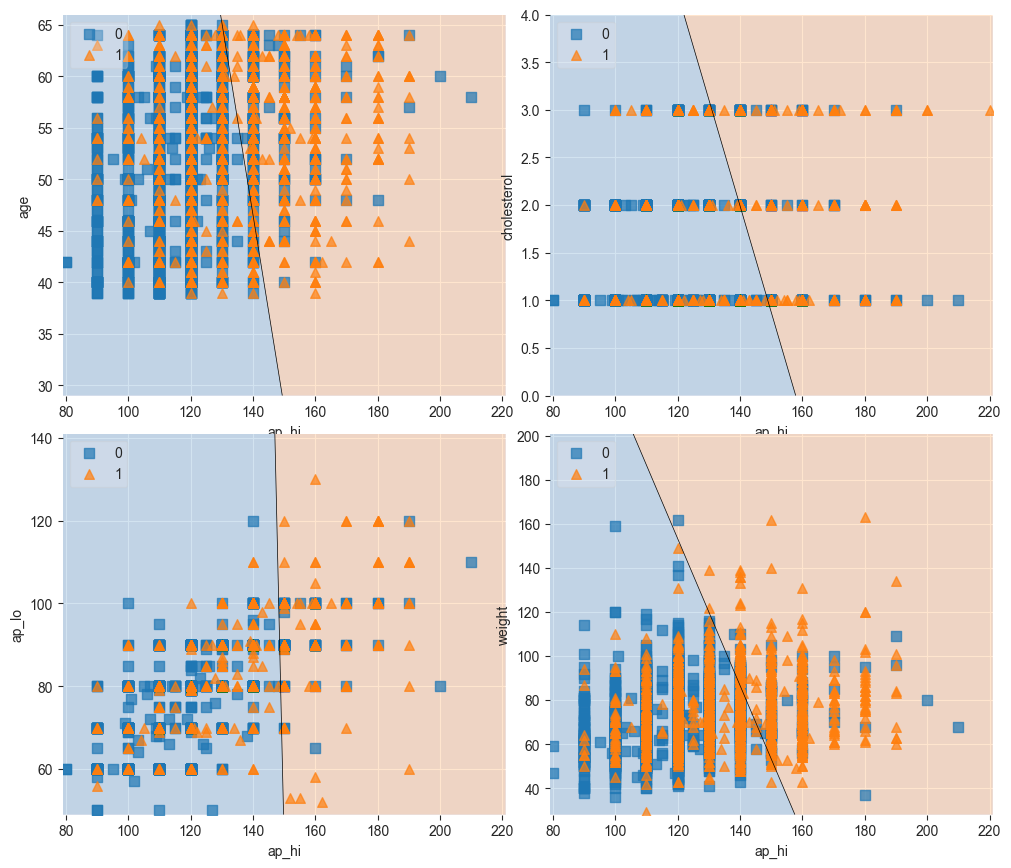

In [46]:
from InterpretableMachineLearning.files.Utils import create_decision_plot

filler_feature_values = {"age": 30, "gender": 1, "height": 165, "weight": 57, "ap_hi": 120, "ap_lo": 80,
                         "cholesterol": 1, "gluc": 1,
                         "smoke": 0, "alco": 0, "active": 1}
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["ap_hi", "age"],
    None,
    X_highlight,
    filler_feature_values,
    ax=ax.flat[0]
)
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["ap_hi", "cholesterol"],
    None,
    X_highlight,
    filler_feature_values,
    ax=ax.flat[1]
)
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["ap_hi", "ap_lo"],
    None,
    X_highlight,
    filler_feature_values,
    ax=ax.flat[2]
)
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["ap_hi", "weight"],
    None,
    X_highlight,
    filler_feature_values,
    ax=ax.flat[3]
)
plt.subplots_adjust(wspace=0.1, hspace=0.1, top=1, bottom=0)
plt.show()